<a href="https://colab.research.google.com/github/antiantono/bts-cda-tareas/blob/main/assignments/Session1_LinearRegression_Exercise_AA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


![BTS](https://github.com/vfp1/bts-dsf-2020/raw/main/Logo-BTS.jpg)

# Session 1: Linear Regression Code Assignement

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Classical Data Analysis (2020-12-21)

An Ecommerce company sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want. The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They need our help to figure it out! 

**When working on the assignment there could be multiple models to explore data or iplement specific analysis. Choose that you retain more appropriate but always justify every choice you make (e.g., why you choose some variables), comment your code, describe the plots and results you obtain.**

Feel free to add many cells as you need to write your code, comments, answers, etc.



### Import libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
sns.set_style('whitegrid')

#### Code to avoid cell auto-scrolling

In [ ]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

#### Read the dataset provided by the company: 
They provide us with a csv file `Ecommerce_Customers.csv`

The dataset contains information about the customers:
* Email: email of the customer.
* Address: address of the customer.
* Avatar: color of the avatar.
* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member.


In [ ]:
customers = pd.read_csv('https://raw.githubusercontent.com/antiantono/bts-cda-2020/main/Session_1/Ecommerce_Customers.csv')
customers.head(3)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505


In [ ]:
customers.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Session Length,500.0,33.053194,0.992563,29.532429,32.341822,33.082008,33.711985,36.139662
Time on App,500.0,12.052488,0.994216,8.508152,11.388153,11.983231,12.753850,15.126994
Time on Website,500.0,37.060445,1.010489,33.913847,36.349257,37.069367,37.716432,40.005182
Length of Membership,500.0,3.533462,0.999278,0.269901,2.930450,3.533975,4.126502,6.922689
Yearly Amount Spent,500.0,499.314038,79.314782,256.670582,445.038277,498.887875,549.313828,765.518462


In [ ]:
customers.describe(exclude=np.number).T

,count,unique,top,freq
Email,500,500,johnathan33@yahoo.com,1
Address,500,500,"4301 Park Lake Apt. 158\nSpencertown, SD 45934",1
Avatar,500,138,GreenYellow,7


### Exploratory Data analysis

Perform some exploratory data analysis:
    - Manual feature engineering. Is there any variable that do not make sense to take into account for your analysis? If yes, remove thos variables.
    - Check for missing values
    - check the distribution of the target variable to see if there is some outlier
    - check which are the variables with highest correlation with the target variable
    - check for multi-colinearity

**Manual feature engineering. Is there any variable that do not make sense to take into account for your analysis? If yes, explain why you think they are useless and remove them.**



Write your answer here:
* For linear regression, we'll look only at numeric variables (we'll ignore email, address, avatar)
* Based on the objective of the analysis, it would make sense to look at yearly amount spent as the outcome (target) variable, and perhaps also at the cumulative value (length of membership x yearly spend) as a long-term metric.
* Based on the data pattern, a combination of time spent on app/website and avg session length could be considered as features. They don't seem to be strongly correlated with one another, but session length / time spent may have a relationship with annual spend (to be checked with correlation).





In [ ]:
customers['Cumulative Spend'] = customers['Length of Membership'] * customers['Yearly Amount Spent']
customers.drop(columns=['Email', 'Address', 'Avatar'], axis=1, inplace=True)
customers.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Cumulative Spend
0,34.497268,12.655651,39.577668,4.082621,587.951054,2400.381104
1,31.926272,11.109461,37.268959,2.664034,392.204933,1044.847349
2,33.000915,11.330278,37.110597,4.104543,487.547505,2001.159797
3,34.305557,13.717514,36.721283,3.120179,581.852344,1815.483339
4,33.330673,12.795189,37.536653,4.446308,599.406092,2665.144293


#### Check Missing values

In [ ]:
# No missing values - yay!
customers.isnull().sum()

Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
Cumulative Spend        0
dtype: int64

#### Check distribution of the target variable

Comment : All possible target variables more or less follow more normal distribution, although Cumulative Spend is a little more right-skewed.

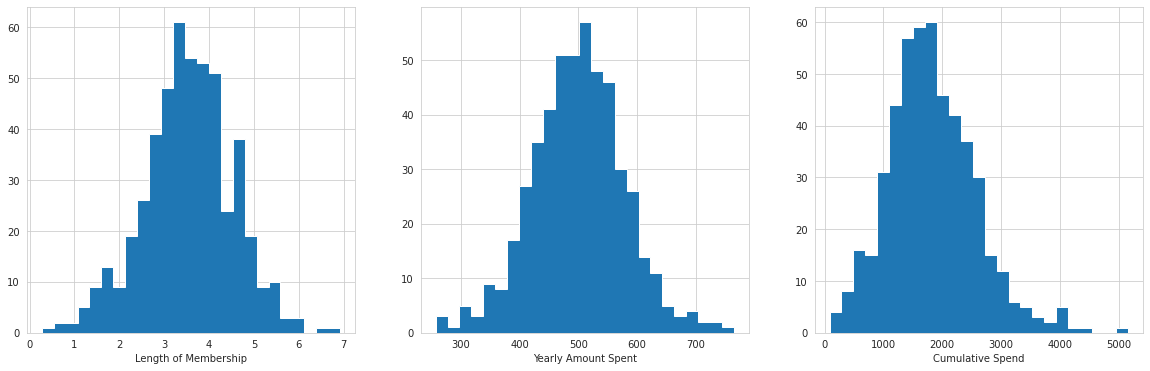

In [ ]:
# Histograms
plt.subplots(1,3, figsize=(20,6))

for ax, colname in enumerate(customers.columns[-3:]):
  plt.subplot(1, 3, ax+1)
  plt.hist(customers[colname], bins=25, histtype='stepfilled')
  plt.xlabel(colname)

plt.show()

In [ ]:
# Compare mean & median of target variables
customers[['Length of Membership','Yearly Amount Spent', 'Cumulative Spend']].describe().T[['mean','50%']]

,mean,50%
Length of Membership,3.533462,3.533975
Yearly Amount Spent,499.314038,498.887875
Cumulative Spend,1828.304629,1766.439828


Length of Membership


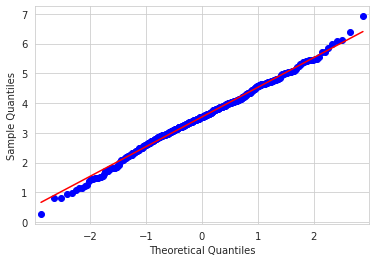

Yearly Amount Spent


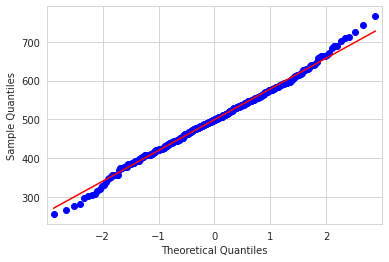

Cumulative Spend


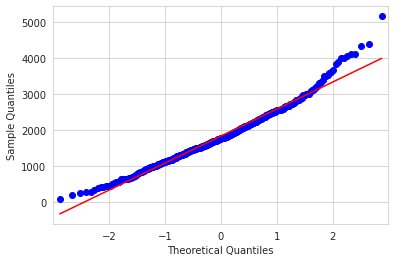

In [ ]:
# Another way to check normality
# All features look normally distributed (quite close to the theoretical quartile lines)

from statsmodels.graphics.gofplots import qqplot

for colname in customers.columns[-3:]:
  print(colname)
  qqplot(customers[colname], line='s')
  plt.show()

#### Check correlation among variables

Explore the relation between each indipendent variable and the dipendent variable using multiple plots, among them also **jointplot** plots. 
    

**Time on app, and also avg session length, seem promising as predictors of Yearly Amount Spend.** <br>

On the other hand, time on website show almost no correlation to the outcome variables, including Yearly Amount Spend. Based on the correlation result alone, my hypothesis is to focus more on the app than the website.

Another good thing : features (session length, time on app, time on website) are not correlated to each other >> low risk of multicollinearity

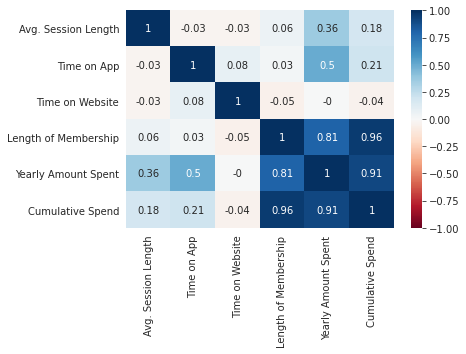

In [ ]:
sns.heatmap(round(customers.corr(),2), 
            annot=True, vmin=-1, vmax=1, cmap='RdBu')

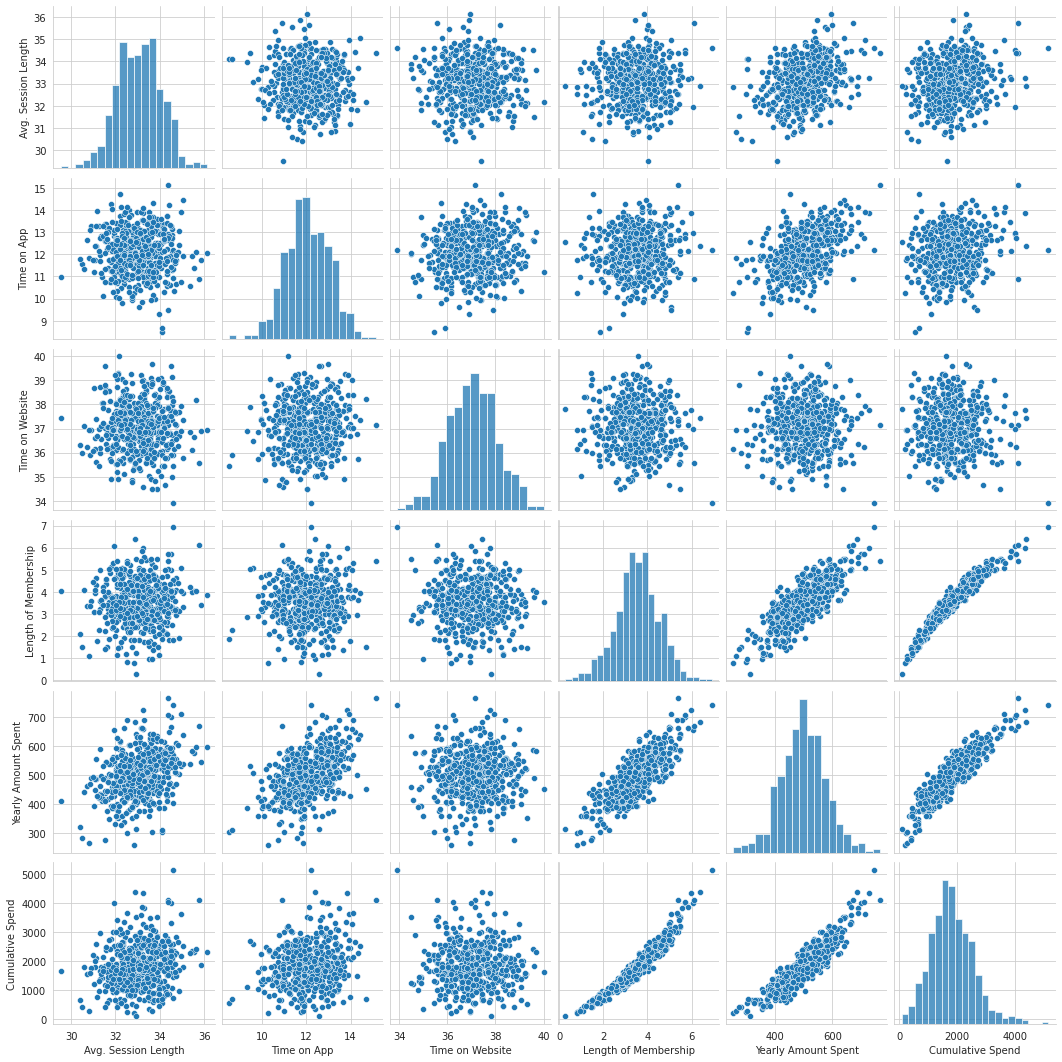

In [ ]:
sns.pairplot(customers)

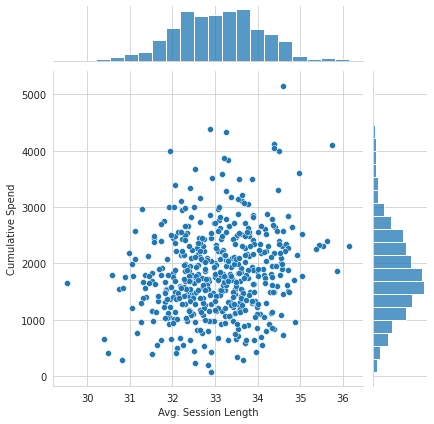

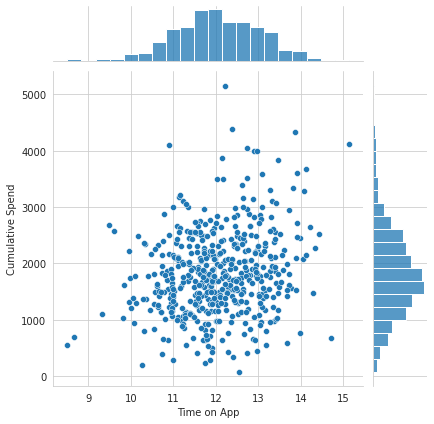

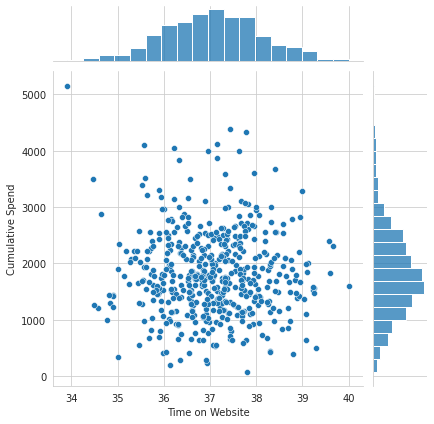

In [ ]:
sns.jointplot(x=customers['Avg. Session Length'], y=customers['Cumulative Spend'])
sns.jointplot(x=customers['Time on App'], y=customers['Cumulative Spend'])
sns.jointplot(x=customers['Time on Website'], y=customers['Cumulative Spend'])

## Predictive model

Now that we have explored a bit the data we want to create a predictive model to understand if 
the company should focus more on their mobile app experience or on their website.

Or maybe there is some other apsect that is still more important and and the company should focus on it!!

Let's implement a simple linear regression model (choose the variable you reatin more appropriate and explain why you chose it) and a multivariate model that uses multiple variables. 

Then, based on your preliminary exploratoy data analysis and on the models' results draw your conclusion.

### Showing result

In [ ]:
# Initiate
model_summary = pd.DataFrame(columns = ['Features', 'Target', 'Set',
                                        'Intercept', 'Coefficient',
                                        'MAE', 'MSE', 'RMSE', 'R2'])
model_summary

,Features,Target,Set,Intercept,Coefficient,MAE,MSE,RMSE,R2


In [ ]:
def update_summary(Y, Y_pred, features='features', target='target', dataset='train or test'):
  ''' Function to update model performance summary
  Tip: run after fitting each model'''

  global model_summary
  model_summary = model_summary.append({'Features': features, 'Target': target, 'Set': dataset,
                                        'Intercept': model.intercept_, 'Coefficient': model.coef_,
                                        'MAE': np.mean((abs(Y - Y_pred))),
                                        'MSE': mean_squared_error(Y, Y_pred),
                                        'RMSE': np.sqrt(mean_squared_error(Y, Y_pred)),
                                        'R2': r2_score(Y, Y_pred)
                                        },
                                       ignore_index=True)

### Simple linear regression

Below I'm selecting three features and two targets, but I will try each combination in univariate models (one pair of feature-target at a time). 

In [ ]:
# All feature candidates
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website']]

# Potential targets
Y = customers[['Yearly Amount Spent', 'Cumulative Spend']]

print(X.shape, Y.shape)

(500, 3) (500, 2)


### Training and test splits
Split the data into training and testing sets. We train the model with 75% of the samples and test with the remaining 25%. We do this to assess the model’s performance on unseen data. To split the data you may use ```scikit-learn library```. Finally print the sizes of our training and test set to verify if the splitting has occurred properly.

**Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set random_state=5**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.25, random_state=5)

print("Training size: ", X_train.shape, Y_train.shape)
print("Test size: ", X_test.shape, Y_test.shape)

Training size:  (375, 3) (375, 2)
Test size:  (125, 3) (125, 2)


### Training of the model

In [ ]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
# Fitting multiple models with different pairs of feature and target

for target in Y.columns:
  for feature in X.columns:
    model.fit(X_train[[feature]], Y_train[target])

    Y_train_pred = model.predict(X_train[[feature]])
    update_summary(Y_train[target], Y_train_pred, features=feature, target=target, dataset='train')

    Y_test_pred = model.predict(X_test[[feature]])
    update_summary(Y_test[target], Y_test_pred, features=feature, target=target, dataset='test')

### Print coefficients, evaluate models

In [ ]:
# Summary of univariate models tried, model parameters and evaluation metrics 
# The best model predicts Yearly Amount Spent with Time on App as a feature (still weak R2, but better than the other combinations) 

round(model_summary,3)

,Features,Target,Set,Intercept,Coefficient,MAE,MSE,RMSE,R2
0,Avg. Session Length,Yearly Amount Spent,train,-561.745,[32.05207632277179],57.274,5493.251,74.116,0.154
1,Avg. Session Length,Yearly Amount Spent,test,-561.745,[32.05207632277179],57.768,5530.700,74.369,0.014
2,Time on App,Yearly Amount Spent,train,6.009,[40.82223137363084],54.473,4781.579,69.149,0.264
3,Time on App,Yearly Amount Spent,test,6.009,[40.82223137363084],52.857,4517.455,67.212,0.195
4,Time on Website,Yearly Amount Spent,train,427.701,[1.8972994000579155],63.398,6491.031,80.567,0.001
5,Time on Website,Yearly Amount Spent,test,427.701,[1.8972994000579155],57.096,5664.535,75.263,-0.010
6,Avg. Session Length,Cumulative Spend,train,-3403.746,[157.68668544897542],560.496,513677.452,716.713,0.045
7,Avg. Session Length,Cumulative Spend,test,-3403.746,[157.68668544897542],590.709,637947.843,798.716,-0.018
8,Time on App,Cumulative Spend,train,-128.526,[160.83883308770166],560.531,511322.428,715.068,0.049
9,Time on App,Cumulative Spend,test,-128.526,[160.83883308770166],581.995,610749.297,781.505,0.025


### Make a plot to show how the model fit the training data.

Looking at the plot explain if the coefficients you found make sense

Text(0, 0.5, 'Yearly Amount Spent')

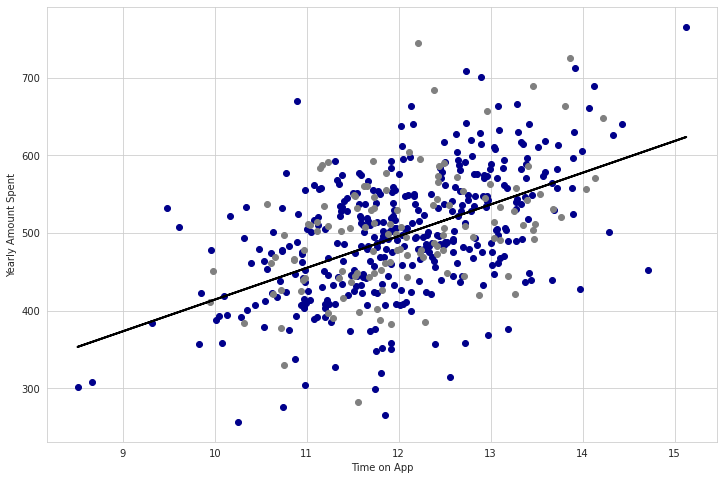

In [ ]:
# Check for the best model : predicting yearly amount spent with Time on App
# Plot all data points

model.fit(X_train[['Time on App']], Y_train['Yearly Amount Spent'])

plt.figure(figsize=(12,8))

plt.scatter(X_train['Time on App'], Y_train['Yearly Amount Spent'], color='darkblue')
plt.scatter(X_test['Time on App'], Y_test['Yearly Amount Spent'], color='grey')

Y_pred = model.intercept_ + model.coef_*X['Time on App']
plt.plot(X['Time on App'], Y_pred, color='black', lw=2)

plt.xlabel('Time on App')
plt.ylabel('Yearly Amount Spent')

## Multivariate Model

For the multivariate model, I'm using the same target (Yearly Amount Spent) but with all features included to do the prediction.

In [ ]:
# All features
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website']]

# Target
Y = customers['Yearly Amount Spent']

print(X.shape, Y.shape)

(500, 3) (500,)


### Training and test splits
Next, we split the data into training and testing sets. We train the model with 75% of the samples and test with the remaining 25%. We do this to assess the model’s performance on unseen data. To split the data you may use ```scikit-learn library```. Finally print the sizes of our training and test set to verify if the splitting has occurred properly.

**Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set random_state=5**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.25, random_state=5)

print("Training size: ", X_train.shape, Y_train.shape)
print("Test size: ", X_test.shape, Y_test.shape)

Training size:  (375, 3) (375,)
Test size:  (125, 3) (125,)


### Training of the model

In [ ]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Print the coeficients of the model

In [ ]:
print("Intercept", model.intercept_)
print("Coefficients")
for i, colname in enumerate(X.columns):
  print("-", colname, ":", model.coef_[i])

Intercept -1058.124109867475
Coefficients
- Avg. Session Length : 31.290015723245467
- Time on App : 40.084390383746886
- Time on Website : 1.0374093683143428


### Evaluate the model on the test set

    - Make some plots you think maybe usefull to evaluate the predictions of our model and then evaluate it through some metrics.

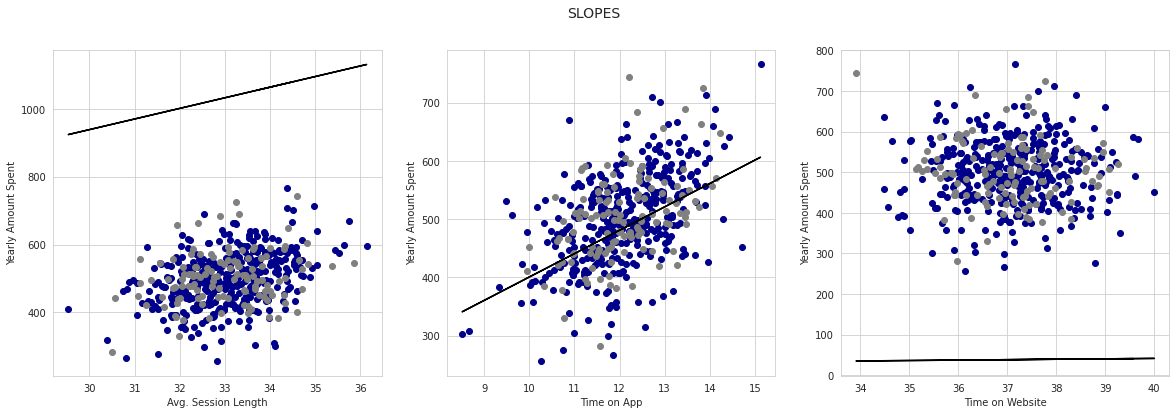

In [ ]:
# The slopes look sensible, they reflect the slopes of the training data 'cloud'

fig, axes = plt.subplots(1,3,figsize=(20,6), sharey=True)

fig.suptitle('SLOPES', fontsize=14)

for i, ax in enumerate(axes):
  plt.subplot(1,3,i+1)
  plt.scatter(X_train.iloc[:,i], Y_train, color='darkblue')
  plt.scatter(X_test.iloc[:,i], Y_test, color='grey')
  plt.plot(X.iloc[:,i], (model.coef_[i]*X.iloc[:,i]), color='black')
  plt.xlabel(X_train.columns[i])
  plt.ylabel('Yearly Amount Spent')

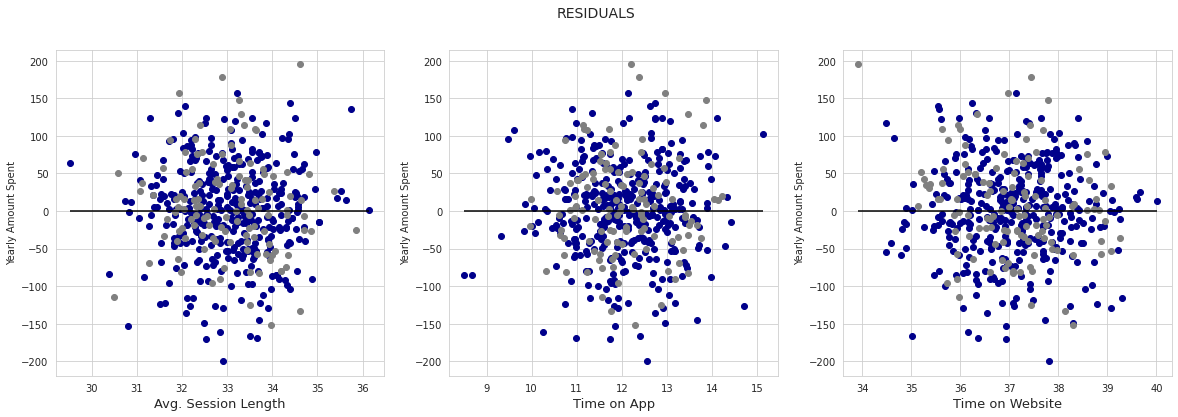

In [ ]:
# Residuals are of similar magnitudes between train and test
# But in both cases they vary quite wild and tend vary more in the middle range of the data
# (maybe this is not an ideal case for regression ...)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

fig, axes = plt.subplots(1,3,figsize=(20,6), sharey=True)

fig.suptitle('RESIDUALS', fontsize=14)

for i, ax in enumerate(axes):
  plt.subplot(1,3,i+1)
  plt.scatter(X_train.iloc[:,i], (Y_train-Y_train_pred), color='darkblue')
  plt.scatter(X_test.iloc[:,i], (Y_test-Y_test_pred), color='grey')
  plt.xlabel(X.columns[i], fontsize=13)
  plt.ylabel('Yearly Amount Spent')
  plt.hlines(0, xmin=X.iloc[:,i].min(), xmax=X.iloc[:,i].max())

#### Evalution Metrics

In [ ]:
from sklearn import metrics

y_train_predict = model.predict(X_train)

print("MULTIVARIATE MODEL PERFORMANCE ON TRAINING SET")
print("MAE:", np.mean((abs(Y_train - y_train_predict))))
print("MSE:", mean_squared_error(Y_train, y_train_predict))
print("RMSE:", np.sqrt(mean_squared_error(Y_train, y_train_predict)))
print("R2 Score", r2_score(Y_train, y_train_predict))

print("\n")

y_test_predict = model.predict(X_test)
print("MULTIVARIATE MODEL PERFORMANCE ON TEST SET")
print("MAE:", np.mean((abs(Y_test - y_test_predict))))
print("MSE:", mean_squared_error(Y_test, y_test_predict))
print("RMSE:", np.sqrt(mean_squared_error(Y_test, y_test_predict)))
print("R2 Score", r2_score(Y_test, y_test_predict))

MULTIVARIATE MODEL PERFORMANCE ON TRAINING SET
MAE: 48.04554739848516
MSE: 3832.9017097126307
RMSE: 61.910432963375655
R2 Score 0.4098414042163495


MULTIVARIATE MODEL PERFORMANCE ON TEST SET
MAE: 48.59305444901012
MSE: 3980.4596893804023
RMSE: 63.09088436042407
R2 Score 0.2903442610868784


#### Which model has better performance?

Write your answer here:
* The simple model, predicting Yearly Amount Spent with Time on App, resulted in RMSE=69.15 and R2=0.264 on training dataset (both metrics slightly lower on test dataset)
* The multivariate model, predicting  Yearly Amount Spent with three features (Time on App, Time on Web, Avg Session Length) DID BETTER with similar RMSE=61.91 but improved R2 = .410





**Describe how you interpret the coefficients of the model and based on that decide how the company shoud behave in order to try to improve their business increasing the `Yearly Amount Spent` per customenr.**

Write your answer here: <br>

* The most important contributor (relatively speaking) to Yearly Amount Spent is Time on App. On the other hand, Time on Website barely contributes at all. 

* Therefore, the company should prioritize engaging customers via the app over the website. 






